<a href="https://colab.research.google.com/github/Alissonfersoa/python-exercicios/blob/master/Pr%C3%A1tica1_Dados_de_Incidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas que serão utilizadas

pandas - para criação do meu dataframe

In [21]:
## importing libraries
## notice to import %matplotlib inline to plot within notebook
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


Buscando os dados que serão trabalhados, esse comando serve para fazer o downloa do .csv dentro do portal do governo de São Francisco

In [5]:
!wget https://data.sfgov.org/api/views/tmnf-yvry/rows.csv

--2020-11-29 23:39:07--  https://data.sfgov.org/api/views/tmnf-yvry/rows.csv
Resolving data.sfgov.org (data.sfgov.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.sfgov.org (data.sfgov.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv’

rows.csv                [        <=>         ] 533.27M  3.82MB/s    in 2m 19s  

2020-11-29 23:41:26 (3.84 MB/s) - ‘rows.csv’ saved [559169754]



Verificando se o arquivo foi baixado corretamente e está em um diretorio da máquina

In [7]:
!ls -ls

total 546076
546072 -rw-r--r-- 1 root root 559169754 Aug 17 16:09 rows.csv
     4 drwxr-xr-x 1 root root      4096 Nov 13 17:33 sample_data


Calculo de tempo gasto para a leitura com comando %%time e importação do arquivo .csv como um data frame

In [23]:
%%time

df = pd.read_csv('rows.csv', sep=',')

CPU times: user 8.29 s, sys: 495 ms, total: 8.79 s
Wall time: 8.8 s


Verificando os nomes de cabeçalhos das colunas dentro do data frame

In [24]:
df.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

Comando len para contar a quantidade de colunas contidas dentro do meu data frame

In [25]:
len(df.columns)

35

Comando df.head para visualizar os cinco primeiros itens do meu data frame

In [26]:
df.head(5)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,7121491514040,71214915,14040,OTHER OFFENSES,INDECENT EXPOSURE,Tuesday,11/27/2007,13:53,NORTHERN,"ARREST, CITED",600 Block of TURK ST,-122.419821,37.782009,POINT (-122.41982062806301 37.782008780606),21.0,4.0,10.0,36.0,7.0,9.0,9.0,28852.0,36.0,NaN,1.0,NaN,1.0,NaN,8.0,2.0,1.0,1.0,1.0,NaN,21.0
1,7036663851040,70366638,51040,NON-CRIMINAL,AIDED CASE,Tuesday,03/20/2007,23:10,TARAVAL,NONE,2400 Block of 15TH AV,-122.471221,37.742297,POINT (-122.47122106942999 37.7422967951105),46.0,10.0,8.0,41.0,1.0,8.0,4.0,29491.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,46.0
2,4059322571000,40593225,71000,NON-CRIMINAL,LOST PROPERTY,Thursday,05/20/2004,12:00,TARAVAL,NONE,19TH AV / WAWONA ST,-122.475288,37.737453,POINT (-122.475287886017 37.7374527165306),NaN,10.0,8.0,41.0,1.0,8.0,4.0,29491.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,3085157264070,30851572,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Thursday,07/17/2003,17:35,INGLESIDE,PROSECUTED BY OUTSIDE AGENCY,100 Block of 29TH ST,-122.423538,37.743834,POINT (-122.42353834343699 37.743834466729),84.0,9.0,5.0,22.0,2.0,7.0,5.0,28859.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,84.0
4,13067727606304,130677276,6304,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Thursday,08/15/2013,04:42,SOUTHERN,NONE,200 Block of KANSAS ST,-122.403631,37.766658,POINT (-122.40363116222801 37.7666581536244),33.0,1.0,9.0,4.0,8.0,2.0,8.0,28853.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,33.0


Criando o data frame df_group para agrupar as incidencias de acordo com a data e contando a quantidade para cada linha

In [27]:
df_group = df.groupby('Date').IncidntNum.count()
df_group.head(5)

Date
01/01/2003    609
01/01/2004    445
01/01/2005    539
01/01/2006    615
01/01/2007    530
Name: IncidntNum, dtype: int64

Usando o comando de reset_index do pandas para conseguir fazer um novo index das colunas

In [28]:
df_group = df.groupby('Date').IncidntNum.count().reset_index()
df_group.head(5)

,Date,IncidntNum
0,01/01/2003,609
1,01/01/2004,445
2,01/01/2005,539
3,01/01/2006,615
4,01/01/2007,530


Ordenando os dados do df_group para o formato de data, para melhor ordenação dos dados

In [29]:
df_group['Date'] = pd.to_datetime(df_group['Date'])
df_group = df_group.sort_values('Date')

df_group.head(5)

,Date,IncidntNum
0,2003-01-01,609
16,2003-01-02,390
32,2003-01-03,425
48,2003-01-04,333
64,2003-01-05,373


Plotando um gráfico para visualizar a quantidade de incidentes em uma distribuição anual

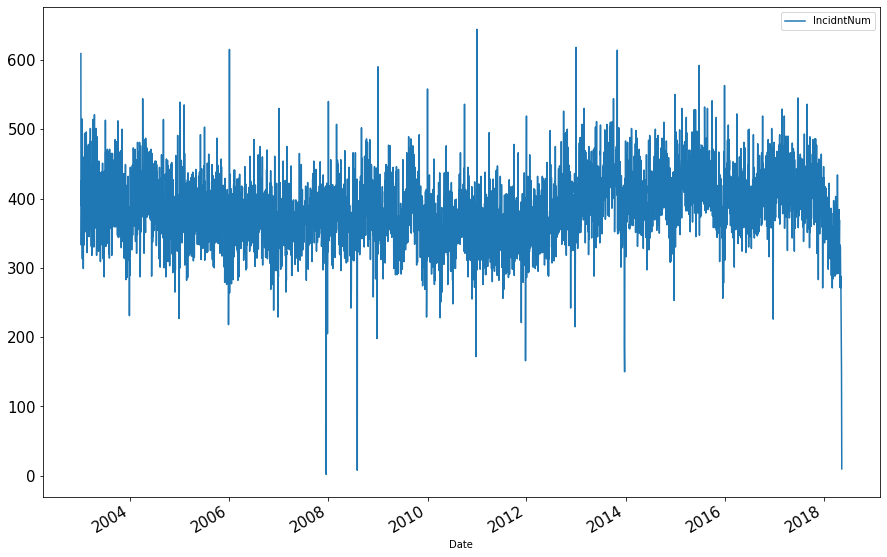

In [30]:
df_group.plot('Date', 'IncidntNum', figsize=(15, 10), fontsize=15);

Realizando um filtro para melhorar a visualização dos dados

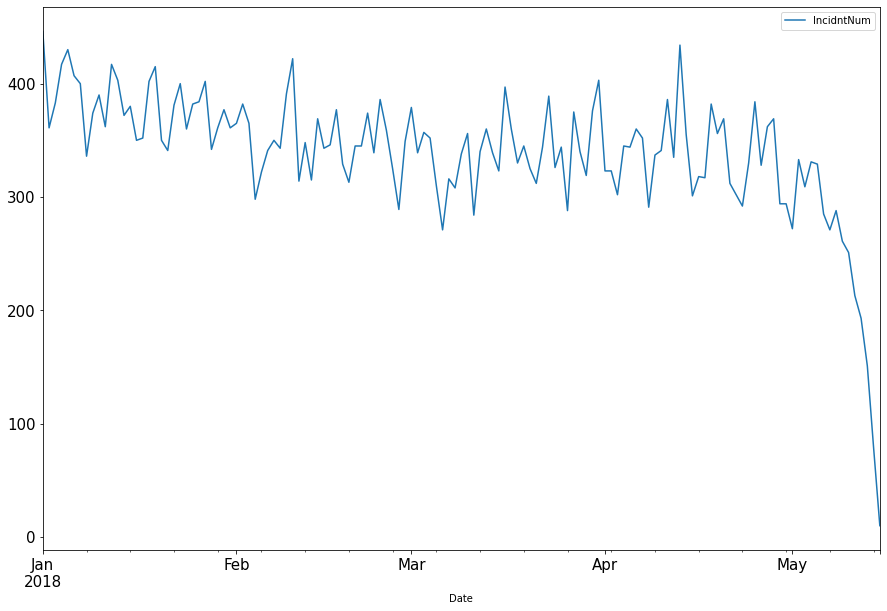

In [33]:
df_group.query('Date >= "2018-01-01"').plot('Date', 'IncidntNum', figsize=(15, 10), fontsize=15)